In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import Pendulum, Pendulum_B, Pendulum_D, plot, plot_bound

# Pendulum dynamics

We consider the following dynamical system with wind $w=[w_x;w_y]\in\mathbb{R}^2$:

$$ml^2\ddot{\theta}-ml\hat{g}\sin\theta = u + \underbrace{f(\theta,\dot{\theta},w)}_{\text{unknown}}$$

In this simulator we use the following quadratic air drag model:
$$F = c_d\cdot\|R\|_2\cdot R,R=w-\begin{bmatrix}l\dot{\theta}\cos\theta \\ -l\dot{\theta}\sin\theta\end{bmatrix}$$
$$f(\theta,\dot{\theta},w) = \underbrace{\vec{l}\times F}_{\text{air drag}} - \underbrace{\alpha\dot{\theta}}_{\text{damping}} + \underbrace{ml(g-\hat{g})\sin\theta}_{\text{gravity mismatch}}$$

# Simulations

In [2]:
# Parameters for simulations
Cd = 0.5 # drag coefficient
alpha = 1.0 # unknown damping term
noise_sigma = 0.1 # noise level
duration = 60

In [19]:
Error = {}
Output = {}
for name in ['no adaptation', 'baseline', 'OMAC (convex)', 'OMAC (element-wise convex)', \
             'OMAC (deep learning)', 'omniscient']:
    Error[name] = []
    Output[name] = []
    
for i in range(10):
    print('Iteration ' + str(i+1) + ':')
    seed = 123456 + i # random seed
    np.random.seed(seed)
    Wind = np.random.normal(size=(100, 2))
    Noise = np.random.normal(scale=noise_sigma, size=20000)
    init_theta = 0.25*np.random.uniform(low=-np.pi,high=np.pi)
    init_dtheta = 0.25*np.random.uniform(low=-np.pi,high=np.pi)

    np.random.seed(seed)
    pendulum_bl = Pendulum(Wind, Noise, init_theta=init_theta, init_dtheta=init_dtheta, \
                        mode='baseline', duration=duration, Cd=Cd, alpha=alpha)
    print('***** No adaptation *****')
    Output_bl, error_bl = pendulum_bl.simulate()
    Error['no adaptation'].append(error_bl)
    Output['no adaptation'].append(Output_bl)

    np.random.seed(seed)
    pendulum_adapt_B = Pendulum_B(Wind, Noise, init_theta=init_theta, init_dtheta=init_dtheta, \
                        mode='meta-adapt', duration=duration, Cd=Cd, alpha=alpha, \
                        eta1_base=0.00, eta2_base=0.02)
    print('***** Baseline adaptation *****')
    Output_adapt_B, error_adapt_B = pendulum_adapt_B.simulate()
    Error['baseline'].append(error_adapt_B)
    Output['baseline'].append(Output_adapt_B)
    
    np.random.seed(seed)
    pendulum_meta = Pendulum(Wind, Noise, init_theta=init_theta, init_dtheta=init_dtheta, \
                        mode='meta-adapt', duration=duration, Cd=Cd, alpha=alpha, \
                        eta1_base=0.005, eta2_base=0.02)
    print('***** OMAC (convex) *****')
    Output_meta, error_meta = pendulum_meta.simulate()
    Error['OMAC (convex)'].append(error_meta)
    Output['OMAC (convex)'].append(Output_meta)
    
    np.random.seed(seed)
    pendulum_meta_B = Pendulum_B(Wind, Noise, init_theta=init_theta, init_dtheta=init_dtheta, \
                        mode='meta-adapt', duration=duration, Cd=Cd, alpha=alpha, \
                        eta1_base=0.02, eta2_base=0.02)
    print('***** OMAC (element-wise convex) *****')
    Output_meta_B, error_meta_B = pendulum_meta_B.simulate()
    Error['OMAC (element-wise convex)'].append(error_meta_B)
    Output['OMAC (element-wise convex)'].append(Output_meta_B)
    
    np.random.seed(seed)
    pendulum_meta_D = Pendulum_D(Wind, Noise, init_theta=init_theta, init_dtheta=init_dtheta, \
                        mode='meta-adapt', duration=duration, Cd=Cd, alpha=alpha, \
                        eta1_base=0.05, eta2_base=0.02)
    print('***** OMAC (deep learning) *****')
    Output_meta_D, error_meta_D = pendulum_meta_D.simulate()
    Error['OMAC (deep learning)'].append(error_meta_D)
    Output['OMAC (deep learning)'].append(Output_meta_D)
    
    np.random.seed(seed)
    pendulum_oracle = Pendulum(Wind, Noise, init_theta=init_theta, init_dtheta=init_dtheta, \
                        mode='oracle', duration=duration, Cd=Cd, alpha=alpha)
    print('***** Omniscient *****')
    Output_oracle, error_oracle = pendulum_oracle.simulate()
    Error['omniscient'].append(error_oracle)
    Output['omniscient'].append(Output_oracle)
    
    print('\n')

Iteration 1:
***** No adaptation *****
ACE: 0.675
***** Baseline adaptation *****
ACE: 0.420
***** OMAC (convex) *****
ACE: 0.126
***** OMAC (element-wise convex) *****
ACE: 0.124
***** OMAC (deep learning) *****
ACE: 0.101
***** Omniscient *****
ACE: 0.015


Iteration 2:
***** No adaptation *****
ACE: 0.701
***** Baseline adaptation *****
ACE: 0.375
***** OMAC (convex) *****
ACE: 0.147
***** OMAC (element-wise convex) *****
ACE: 0.157
***** OMAC (deep learning) *****
ACE: 0.114
***** Omniscient *****
ACE: 0.039


Iteration 3:
***** No adaptation *****
ACE: 0.507
***** Baseline adaptation *****
ACE: 0.179
***** OMAC (convex) *****
ACE: 0.104
***** OMAC (element-wise convex) *****
ACE: 0.067
***** OMAC (deep learning) *****
ACE: 0.077
***** Omniscient *****
ACE: 0.033


Iteration 4:
***** No adaptation *****
ACE: 0.718
***** Baseline adaptation *****
ACE: 0.505
***** OMAC (convex) *****
ACE: 0.168
***** OMAC (element-wise convex) *****
ACE: 0.230
***** OMAC (deep learning) *****
ACE: 0.

In [20]:
for name in ['no adaptation', 'baseline', 'OMAC (convex)', 'OMAC (element-wise convex)', \
             'OMAC (deep learning)', 'omniscient']:
    print('***** ' + name + ' *****')
    print('ACE mean and std: %.3f, %.3f' % (np.mean(Error[name]), np.std(Error[name])))

***** no adaptation *****
ACE mean and std: 0.663, 0.142
***** baseline *****
ACE mean and std: 0.311, 0.112
***** OMAC (convex) *****
ACE mean and std: 0.147, 0.047
***** OMAC (element-wise convex) *****
ACE mean and std: 0.129, 0.044
***** OMAC (deep learning) *****
ACE mean and std: 0.093, 0.027
***** omniscient *****
ACE mean and std: 0.034, 0.017


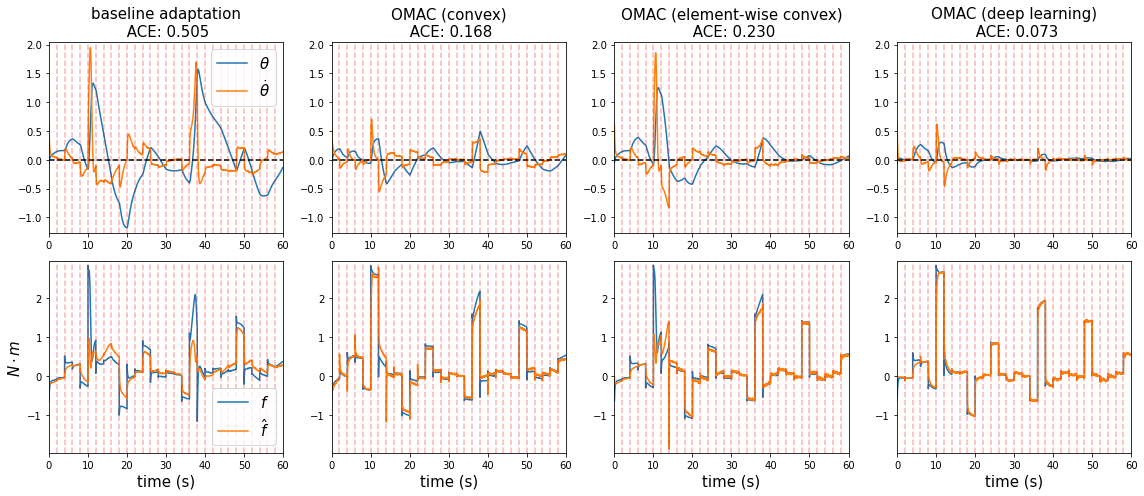

In [28]:
i = 3
Output_adapt_B = Output['baseline'][i]
Output_meta = Output['OMAC (convex)'][i]
Output_meta_B = Output['OMAC (element-wise convex)'][i]
Output_meta_D = Output['OMAC (deep learning)'][i]
Output_oracle = Output['omniscient'][i]

lower = np.asarray([plot_bound(Output_adapt_B)[0], plot_bound(Output_meta)[0], \
                    plot_bound(Output_meta_B)[0], plot_bound(Output_meta_D)[0]]).min(0)
upper = np.asarray([plot_bound(Output_adapt_B)[1], plot_bound(Output_meta)[1], \
                    plot_bound(Output_meta_B)[1], plot_bound(Output_meta_D)[1]]).max(0)
ylim1 = [lower[0]-0.1, upper[0]+0.1]
ylim2 = [lower[1]-0.1, upper[1]+0.1]
xlim = [0, duration]

plt.figure(figsize=(16, 7))
ax1 = plt.subplot(2, 4, 1)
ax2 = plt.subplot(2, 4, 5)
plot(pendulum_adapt_B, Output_adapt_B, ax1, ax2, 'baseline adaptation', ylim1, ylim2, xlim, ylabel=True, legend=True)

ax1 = plt.subplot(2, 4, 2)
ax2 = plt.subplot(2, 4, 6)
plot(pendulum_meta, Output_meta, ax1, ax2, 'OMAC (convex)', ylim1, ylim2, xlim)

ax1 = plt.subplot(2, 4, 3)
ax2 = plt.subplot(2, 4, 7)
plot(pendulum_meta_B, Output_meta_B, ax1, ax2, 'OMAC (element-wise convex)', ylim1, ylim2, xlim)

ax1 = plt.subplot(2, 4, 4)
ax2 = plt.subplot(2, 4, 8)
plot(pendulum_meta_D, Output_meta_D, ax1, ax2, 'OMAC (deep learning)', ylim1, ylim2, xlim)

plt.tight_layout()
#plt.savefig('experiments.pdf')
plt.show()